In [1]:
import torch
import pyro
from torch.utils.data import DataLoader, random_split, TensorDataset
import numpy as np
import os
from cities.utils.data_grabber import find_repo_root
from cities.utils.data_loader import ZoningDataset
from cities.modeling.evaluation import prep_data_for_test, test_performance

from cities.modeling.simple_linear import SimpleLinear
from cities.modeling.svi_inference import run_svi_inference
from pyro.infer import Predictive
from chirho.robust.handlers.predictive import PredictiveModel


import matplotlib.pyplot as plt
import seaborn as sns

root = find_repo_root()

[iteration 0001] loss: 336.9220
[iteration 0050] loss: 310.1179
[iteration 0100] loss: 277.6557
[iteration 0150] loss: 264.5176
[iteration 0200] loss: 266.2944
[iteration 0250] loss: 257.6673
[iteration 0300] loss: 265.6828
[iteration 0350] loss: 260.5504
[iteration 0400] loss: 261.0305
[iteration 0450] loss: 260.4505
[iteration 0500] loss: 262.3196
[iteration 0550] loss: 263.1378
[iteration 0600] loss: 255.5193
Test set residuals, Rsquared: 0.42


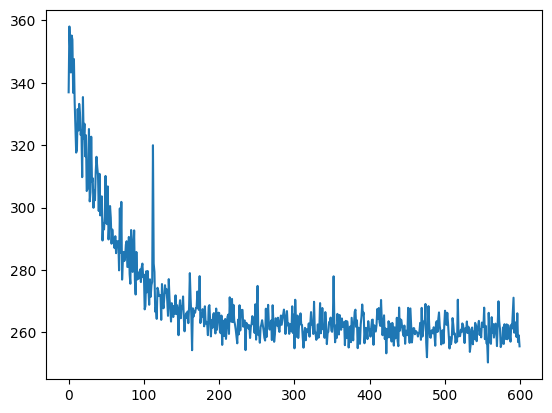

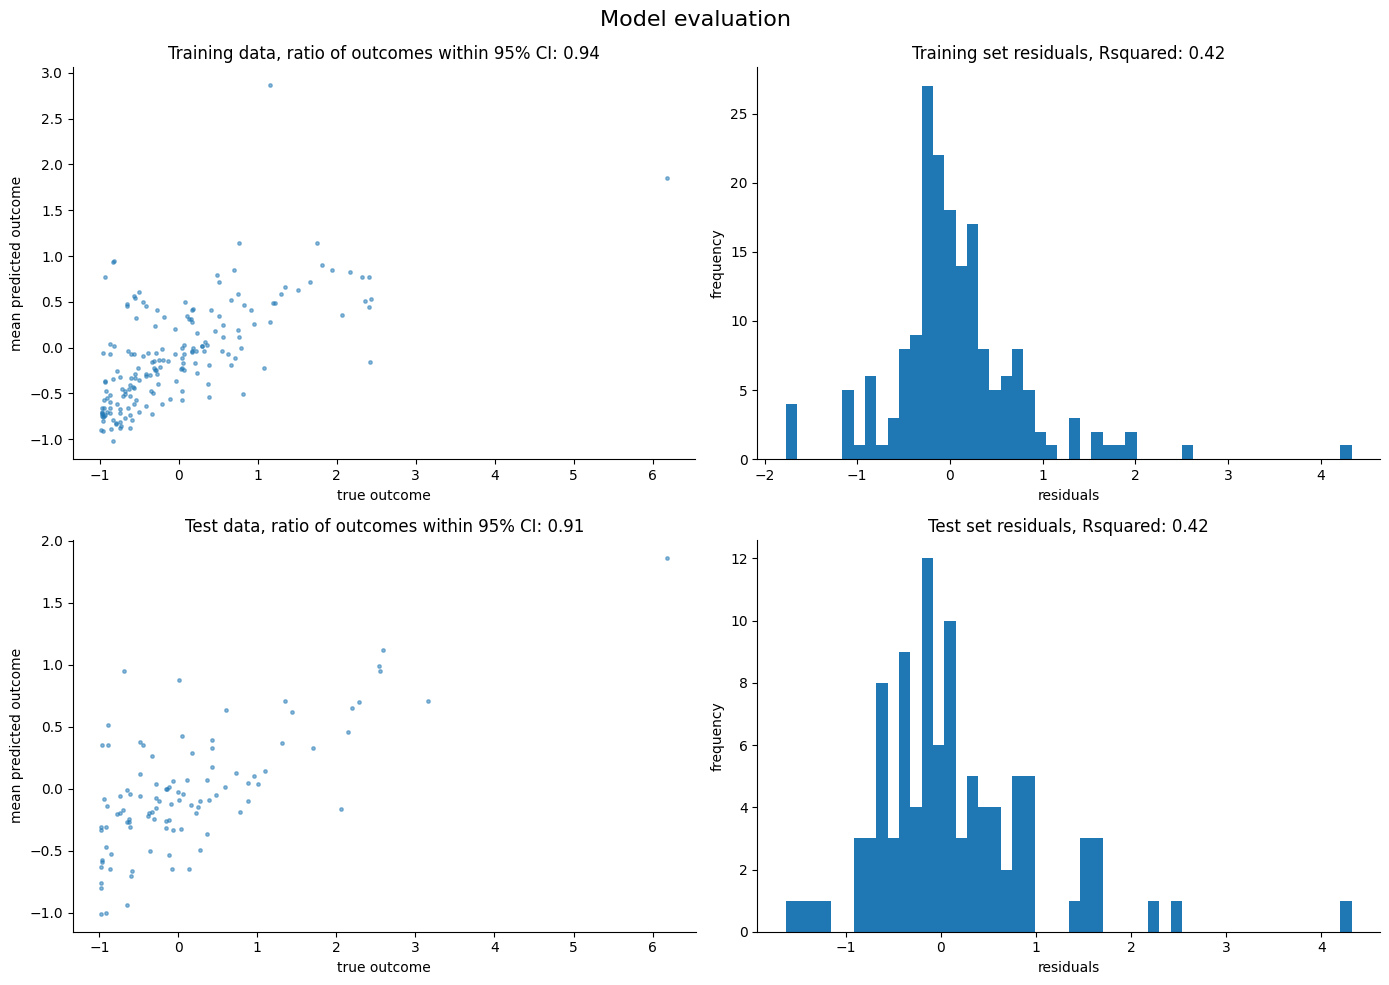

{'mae_train': 0.48273882269859314,
 'mae_test': 0.6055423617362976,
 'rsquared_train': tensor(0.4249),
 'rsquared_test': tensor(0.4171),
 'coverage_train': 0.939226508140564,
 'coverage_test': 0.9100000262260437}

In [4]:
train_loader, test_loader, categorical_levels = prep_data_for_test(train_size=0.6)

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)

[iteration 0001] loss: 348.6778
[iteration 0050] loss: 262.3188
[iteration 0100] loss: 258.0632
[iteration 0150] loss: 253.9674
[iteration 0200] loss: 249.5614
[iteration 0250] loss: 250.3179
[iteration 0300] loss: 250.1906
[iteration 0350] loss: 250.7151
[iteration 0400] loss: 250.1431
[iteration 0450] loss: 250.5296
[iteration 0500] loss: 250.8011
[iteration 0550] loss: 250.8333
[iteration 0600] loss: 250.6255


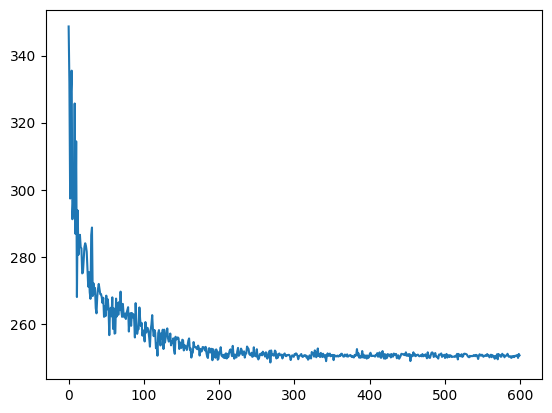

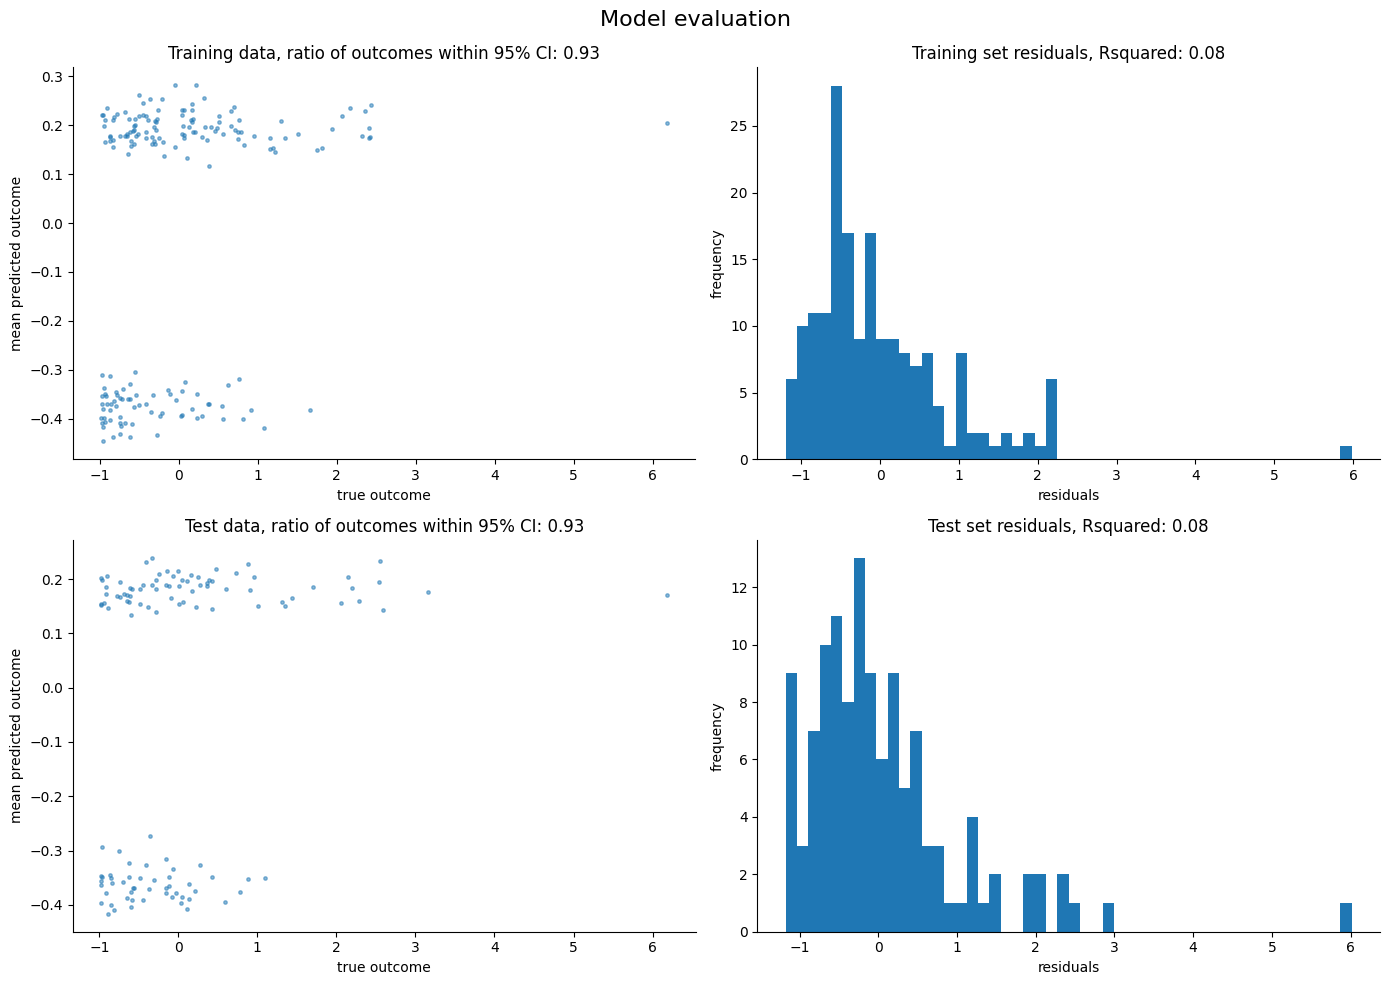

{'mae_train': 0.671817421913147,
 'mae_test': 0.6910492181777954,
 'rsquared_train': tensor(0.0806),
 'rsquared_test': tensor(0.0812),
 'coverage_train': 0.9281768202781677,
 'coverage_test': 0.9256198406219482}

In [5]:
# note just using limit id without parcel size is not very good

pyro.clear_param_store()

limit_kwarg_names = {
    "categorical": ["limit_id"],
    "continuous": {},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear,
    limit_kwarg_names,
    train_loader,
    test_loader,
    categorical_levels,
    plot=True,
)

[iteration 0001] loss: 1078.6567
[iteration 0050] loss: 469.8433
[iteration 0100] loss: 307.1995
[iteration 0150] loss: 291.4823
[iteration 0200] loss: 264.3389
[iteration 0250] loss: 266.3608
[iteration 0300] loss: 267.3744
[iteration 0350] loss: 257.6014
[iteration 0400] loss: 258.3453
[iteration 0450] loss: 257.4400
[iteration 0500] loss: 256.5814
[iteration 0550] loss: 261.3239
[iteration 0600] loss: 263.0456


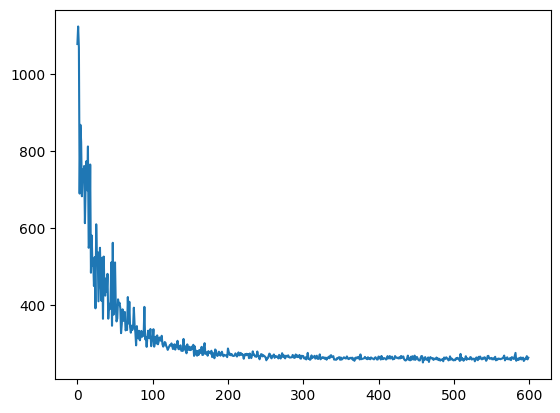

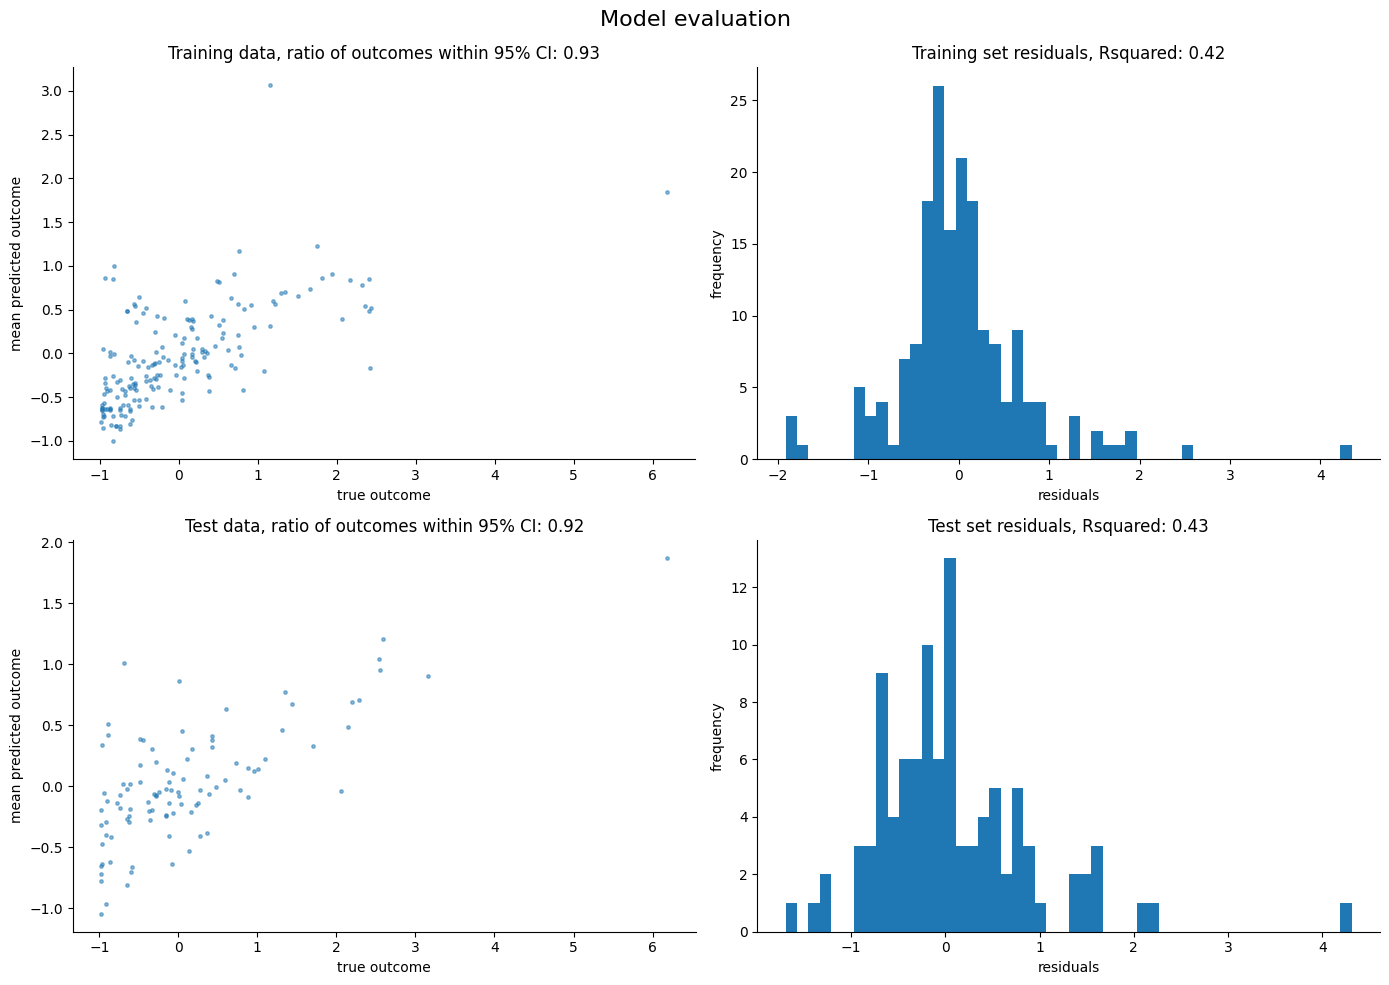

{'mae_train': 0.4841829538345337,
 'mae_test': 0.5987932682037354,
 'rsquared_train': tensor(0.4206),
 'rsquared_test': tensor(0.4269),
 'coverage_train': 0.9337016344070435,
 'coverage_test': 0.9200000166893005}

In [6]:
# adding information about year, not much improvement 

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id", 'year_id'],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)

[iteration 0001] loss: 371.4592
[iteration 0050] loss: 293.5357
[iteration 0100] loss: 276.9263
[iteration 0150] loss: 260.0886
[iteration 0200] loss: 264.4848
[iteration 0250] loss: 255.9603
[iteration 0300] loss: 260.3510
[iteration 0350] loss: 261.0880
[iteration 0400] loss: 259.2023
[iteration 0450] loss: 260.5154
[iteration 0500] loss: 262.6394
[iteration 0550] loss: 258.0988
[iteration 0600] loss: 263.7669


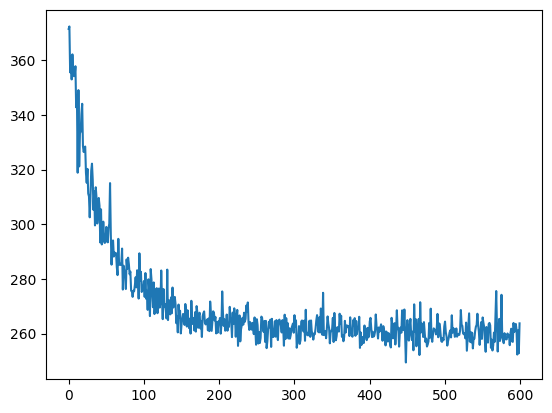

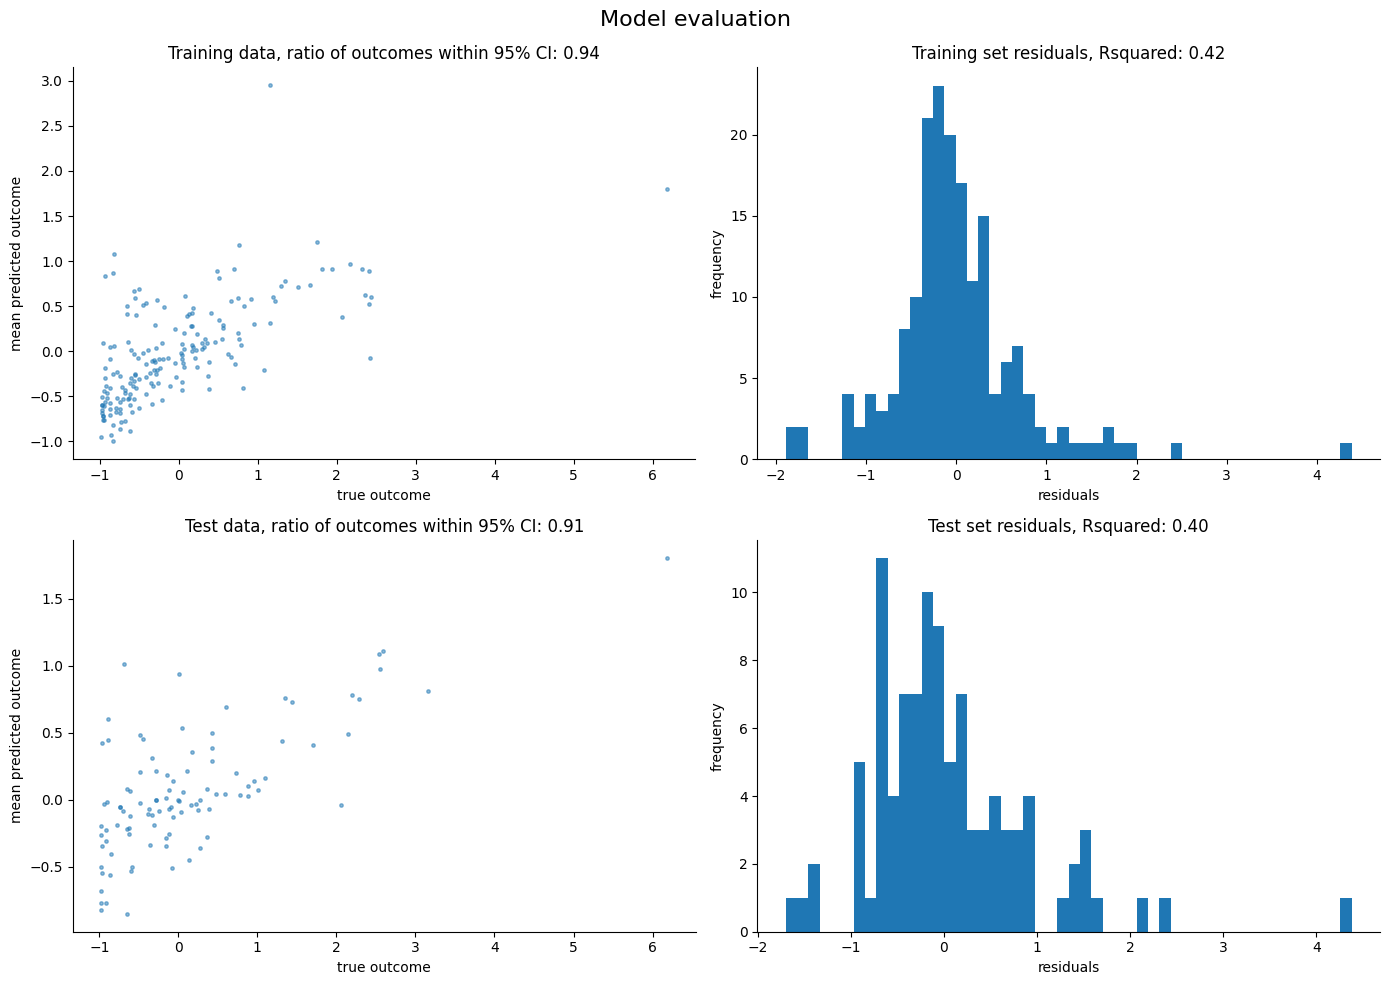

{'mae_train': 0.4877510666847229,
 'mae_test': 0.6115579009056091,
 'rsquared_train': tensor(0.4240),
 'rsquared_test': tensor(0.4050),
 'coverage_train': 0.939226508140564,
 'coverage_test': 0.9100000262260437}

In [7]:
# add month to linear model itself. 

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id", 'year_id', 'month_id'],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)


[iteration 0001] loss: 386.2854
[iteration 0050] loss: 301.6163
[iteration 0100] loss: 277.3794
[iteration 0150] loss: 269.8240
[iteration 0200] loss: 263.2381
[iteration 0250] loss: 268.6579
[iteration 0300] loss: 272.9825
[iteration 0350] loss: 268.3787
[iteration 0400] loss: 263.1782
[iteration 0450] loss: 258.8941
[iteration 0500] loss: 257.1353
[iteration 0550] loss: 256.6524
[iteration 0600] loss: 259.4407


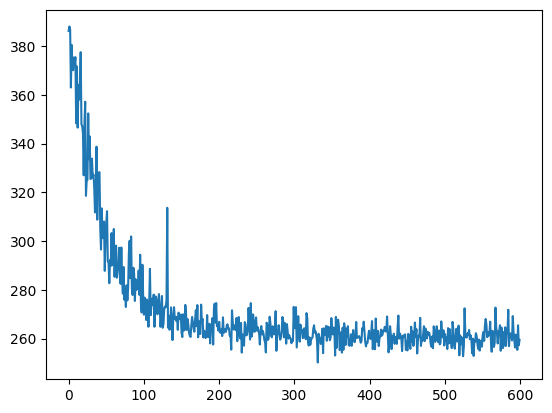

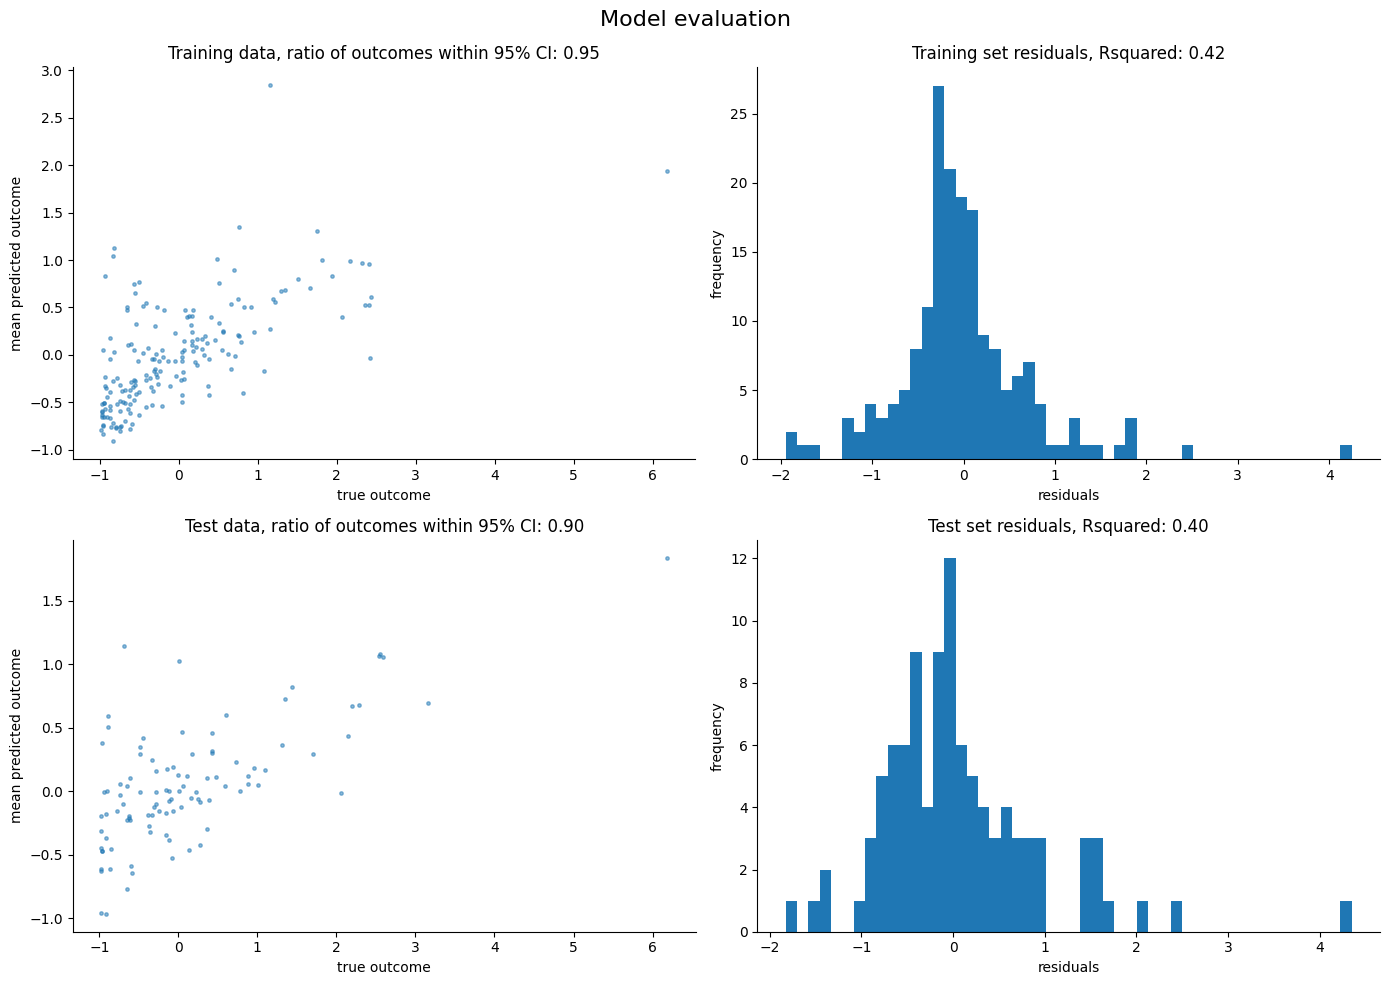

{'mae_train': 0.4894361197948456,
 'mae_test': 0.6074243783950806,
 'rsquared_train': tensor(0.4249),
 'rsquared_test': tensor(0.3952),
 'coverage_train': 0.950276255607605,
 'coverage_test': 0.8999999761581421}

In [8]:
# add month drop year to linear model itself.

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id", 'month_id'],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)


[iteration 0001] loss: 384.3096
[iteration 0050] loss: 239.2007
[iteration 0100] loss: 212.5201
[iteration 0150] loss: 217.3065
[iteration 0200] loss: 209.8718
[iteration 0250] loss: 212.1469
[iteration 0300] loss: 213.0929
[iteration 0350] loss: 209.0110
[iteration 0400] loss: 212.5148
[iteration 0450] loss: 210.6844
[iteration 0500] loss: 209.7385
[iteration 0550] loss: 213.0420
[iteration 0600] loss: 211.3014


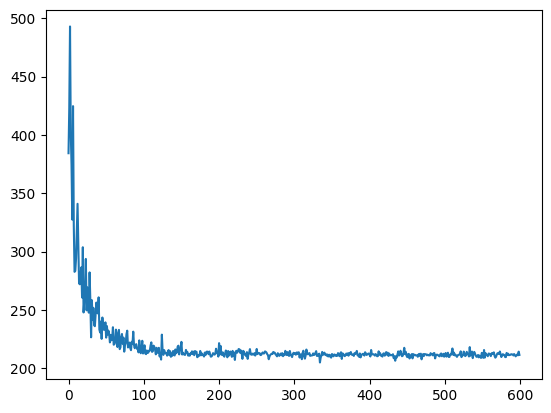

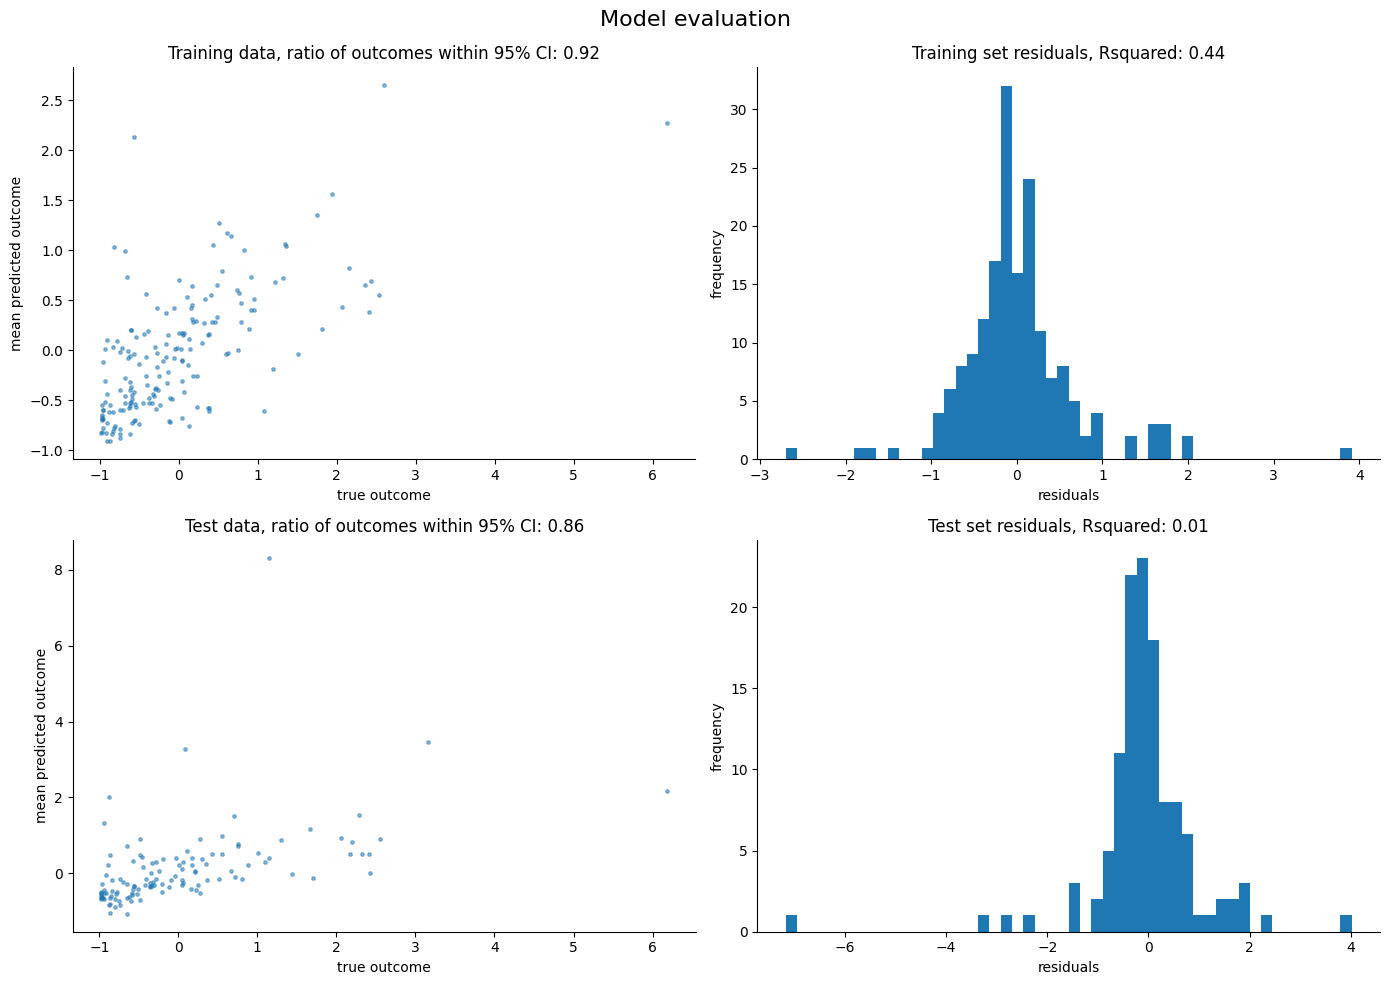

{'mae_train': 0.45458123087882996,
 'mae_test': 0.6197748780250549,
 'rsquared_train': tensor(0.4407),
 'rsquared_test': tensor(0.0085),
 'coverage_train': 0.9171270728111267,
 'coverage_test': 0.8595041036605835}

In [7]:
#switch to zones and past reform


kwarg_names = {
    "categorical": ["zone_id", "year_id", 'month_id', "past_reform"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)


[iteration 0001] loss: 536.6303
[iteration 0050] loss: 234.1033
[iteration 0100] loss: 228.5404
[iteration 0150] loss: 221.2234
[iteration 0200] loss: 211.3374
[iteration 0250] loss: 212.7973
[iteration 0300] loss: 213.1762
[iteration 0350] loss: 212.8781
[iteration 0400] loss: 211.0961
[iteration 0450] loss: 213.0737
[iteration 0500] loss: 210.9907
[iteration 0550] loss: 210.5549
[iteration 0600] loss: 211.9428


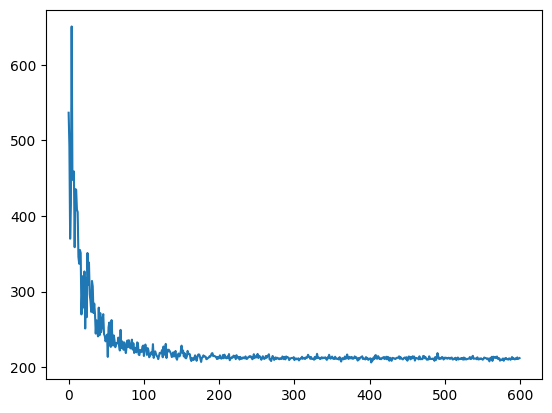

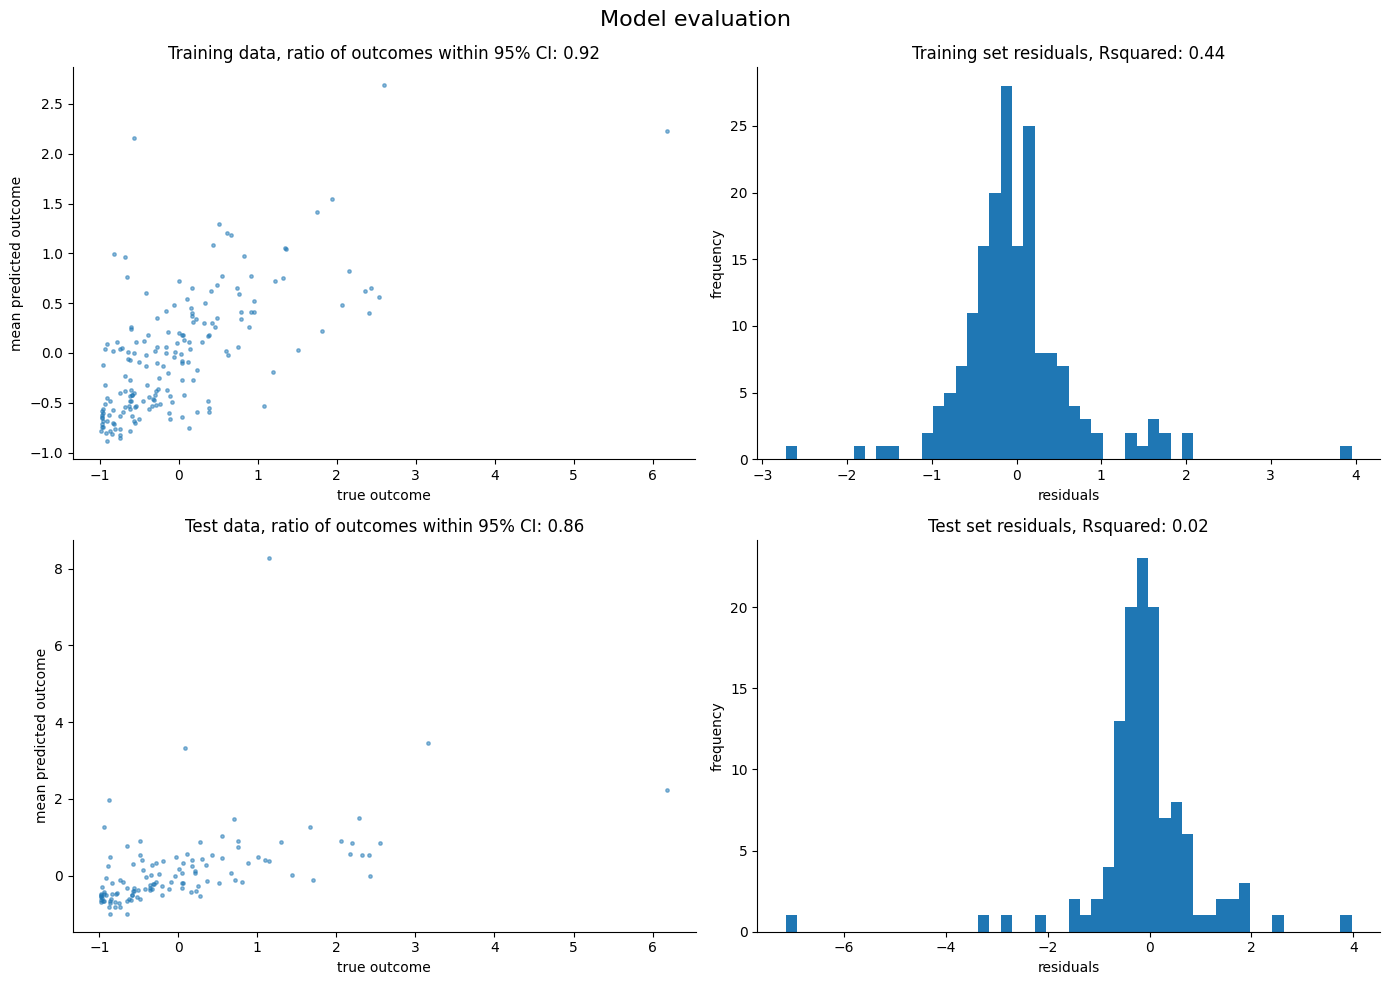

{'mae_train': 0.45764365792274475,
 'mae_test': 0.6193642020225525,
 'rsquared_train': tensor(0.4413),
 'rsquared_test': tensor(0.0184),
 'coverage_train': 0.9171270728111267,
 'coverage_test': 0.8595041036605835}

In [8]:
# drop year as causally up from past reform

kwarg_names = {
    "categorical": ["zone_id", 'month_id', "past_reform"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)

[iteration 0001] loss: 260.2432
[iteration 0050] loss: 217.1000
[iteration 0100] loss: 215.6780
[iteration 0150] loss: 211.9501
[iteration 0200] loss: 212.2004
[iteration 0250] loss: 214.6218
[iteration 0300] loss: 212.9709
[iteration 0350] loss: 215.0820
[iteration 0400] loss: 209.9030
[iteration 0450] loss: 209.6919
[iteration 0500] loss: 212.1684
[iteration 0550] loss: 210.7466
[iteration 0600] loss: 213.3768


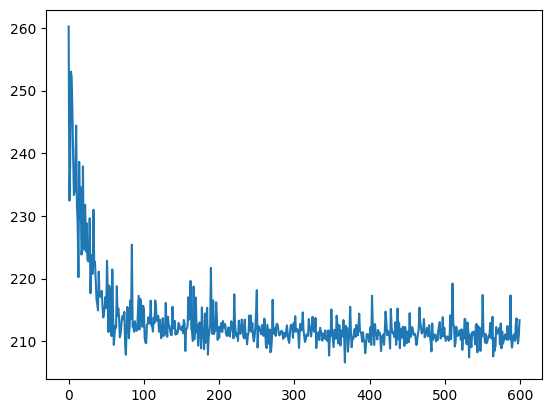

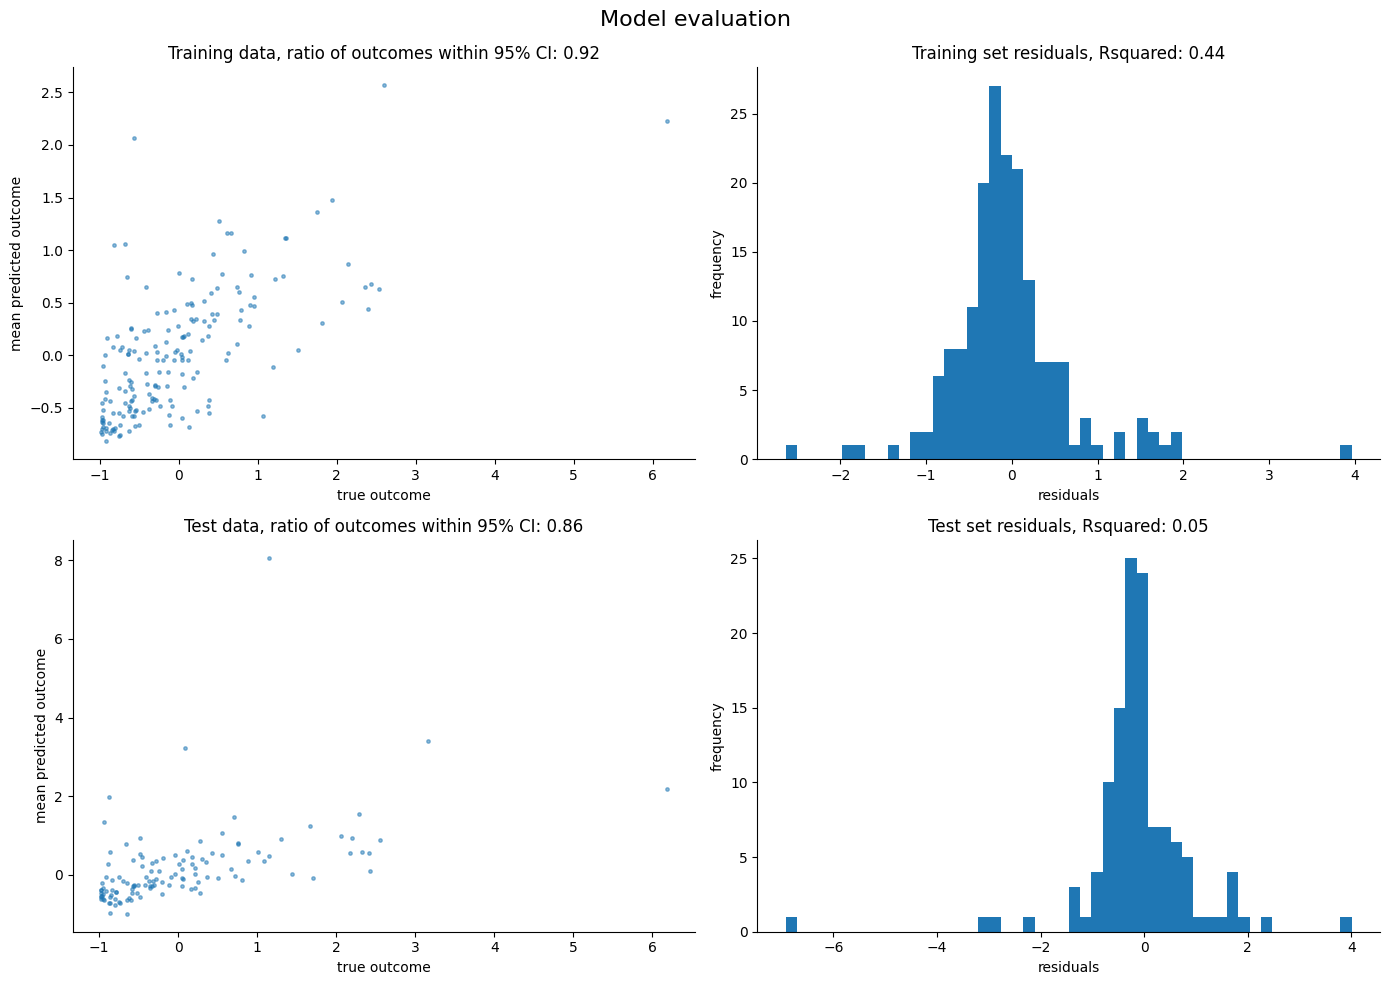

{'mae_train': 0.46067970991134644,
 'mae_test': 0.6316331624984741,
 'rsquared_train': tensor(0.4426),
 'rsquared_test': tensor(0.0462),
 'coverage_train': 0.9171270728111267,
 'coverage_test': 0.8595041036605835}

In [9]:
#drop month

kwarg_names = {
    "categorical": ["zone_id", "past_reform"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)